In [317]:
from jax import grad
import jax.numpy as jnp
from scipy.integrate import solve_ivp
import jax.numpy as jnp
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import scipy.ndimage
import sklearn
import pysindy as ps
from sklearn.gaussian_process import kernels

In [226]:
alpha = np.array([[3],[4],[7.2]])
beta = np.array([[-2,-1,0],[0,-1,-2],[-2.6,-1.6,-3]])
z = np.array([[.1],[.8],[.3]])
lc_beta = np.array([[-.5,-1,0],[0,-1,-2],[-2.6,-1.6,-3]])

In [320]:
print(beta)
print(alpha+beta)

[[-2.  -1.   0. ]
 [ 0.  -1.  -2. ]
 [-2.6 -1.6 -3. ]]
[[1.  2.  3. ]
 [4.  3.  2. ]
 [4.6 5.6 4.2]]


In [351]:
def glv(t ,z, alpha, beta):
    z1 = np.array([z])
    temp = z1.T * (alpha + beta @ z1.T)
    return temp.T.reshape(3).tolist()

In [426]:
z0=[.1,.8,.3]
t_eval = np.linspace(0, 50, 1000)
t_span = (t_eval[0], t_eval[-1])
sol = solve_ivp(glv, t_span, z0, t_eval=t_eval, args=(alpha, beta))
tf = sol.t
xf = sol.y[0]
yf = sol.y[1]
zf = sol.y[2]

In [427]:
z0=[.5,.2,.9]
t_eval = np.linspace(0, 50, 1000)
t_span = (t_eval[0], t_eval[-1])
sol = solve_ivp(glv, t_span, z0, t_eval=t_eval, args=(alpha, beta))
tg = sol.t
xg = sol.y[0]
yg = sol.y[1]
zg = sol.y[2]

In [433]:
z0=[2,2,2]
t_eval = np.linspace(0, 50, 1000)
t_span = (t_eval[0], t_eval[-1])
sol = solve_ivp(glv, t_span, z0, t_eval=t_eval, args=(alpha, beta))
th = sol.t
xh = sol.y[0]
yh = sol.y[1]
zh = sol.y[2]

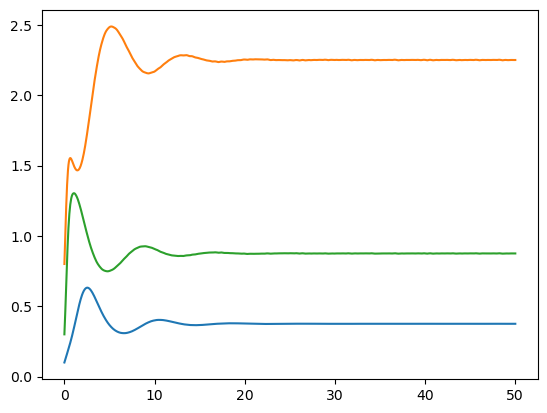

In [429]:
plt.figure()
plt.plot(tf, xf)
plt.plot(tf, yf)
plt.plot(tf, zf)
plt.show()

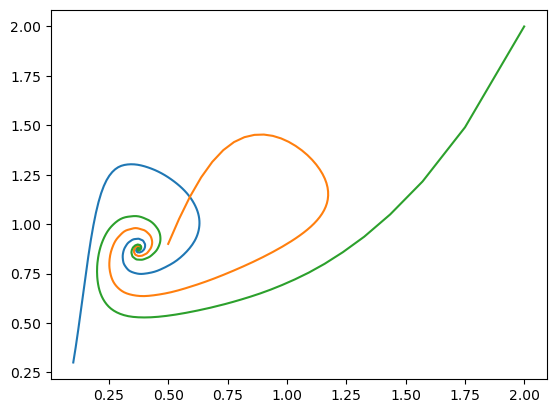

In [434]:
plt.plot(xf,zf)
plt.plot(xg,zg)
plt.plot(xh,zh)

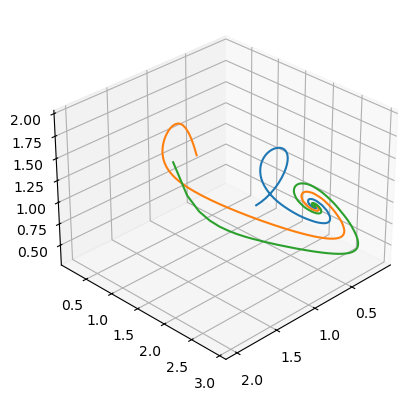

In [445]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xf,yf,zf)
ax.plot(xg,yg,zg)
ax.plot(xh,yh,zh)
ax.view_init(azim=45, elev=30)

In [432]:
combined = np.array([[xf,yf,zf],[xg,yg,zg],[xh,yh,zh]])
np.shape(combined)

(3, 3, 1000)

In [329]:
sol_noisy = sol.y + np.random.uniform(size=(np.shape(sol.y)))

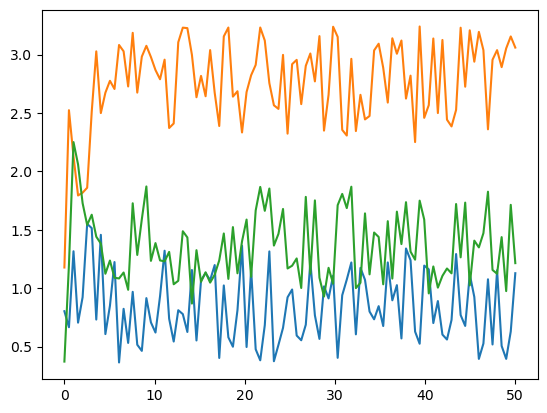

In [330]:
plt.figure()
plt.plot(tf, sol_noisy[0])
plt.plot(tf, sol_noisy[1])
plt.plot(tf, sol_noisy[2])
plt.show()

In [400]:
result = scipy.ndimage.gaussian_filter(sol_noisy,sigma=10,axes=1)
print(np.shape(result))

(3, 100)


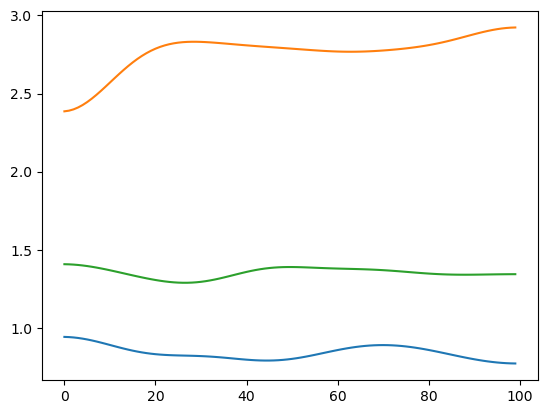

In [401]:
plt.plot(result[0])
plt.plot(result[1])
plt.plot(result[2])

In [342]:
full_grad = jnp.gradient(result,axis=1)

In [345]:
test = full_grad[0]/full_grad[2]
np.mean(test)

Array(0.1732972, dtype=float32)

In [346]:
result1 = scipy.ndimage.gaussian_filter(full_grad,sigma=2,axes=1)

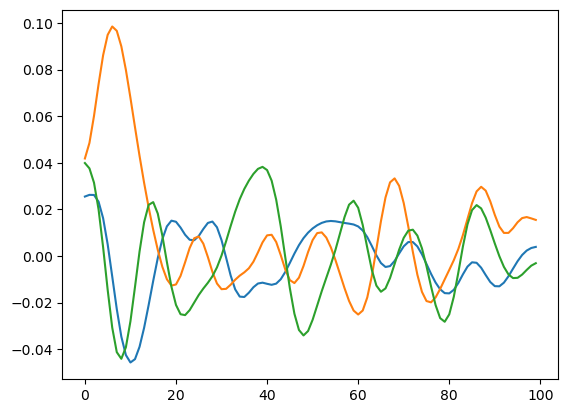

In [350]:
plt.plot(result1[0])
plt.plot(result1[1])
plt.plot(result1[2])